We want to match the self inductance of the squid loop in a Mod7.5 qubit to the self inductance we are used to in the Mod7.0 qubits.

## FastHenry Simulation

I will use fasthenry to simulate the self inductance of the qubit, as it supports superconductivity. Unfortunately that means I have to setup the very annoying input files. 

In [30]:
import subprocess
from numpy import *
from IPython.display import Image

### Input File Preparation

In [7]:
def writeinputfile(filename, width=20, height=20):
    f = open(filename, 'w')
# Prepare Header

    header = "* Qubit Loop Test\n"
    header += "* 07/15/2015\n\n"
    header += "* The following line names micrometers as the length units for the rest of the file\n"
    header += ".units um\n\n"
    header += "* Make z=0 the default z coordinate\n"
    header += ".default z=0\n\n"

    header += "* Make superconducting\n"
    header += ".default lambda = 85e-3\n\n"

    header += "*.default nhinc=10 nwinc=20\n"
    f.write(header)

    # Make Squid Loop

    loop = "* Squid Loop\n\n"
    loop += "N1 x=" + str(-1*width/2) + " y=" + str(height/2) + "\n"
    loop += "N2 x=" + str(1*width/2) + " y=" + str(height/2) + "\n"
    loop += "N3 x=" + str(1*width/2) + " y=" + str(-height/2) + "\n"
    loop += "N4 x=" + str(-1*width/2) + " y=" + str(-height/2) + "\n"
    loop += "N5 x=" + str(-1*width/2) + " y=" + str(height/2) + "\n\n"

    loop += "E1 N1 N2 w=.1 h=0.1\n" 
    loop += "E2 N2 N3 w=.1 h=0.1\n" 
    loop += "E3 N3 N4 w=.1 h=0.1\n" 
    loop += "E4 N4 N5 w=.1 h=0.1\n\n" 

    f.write(loop)

    # Make Capacitors

    cap = "* Capacitor\n\n"
    cap += "N6 x=250 y=95\n"
    cap += "N7 x=-250 y=95\n"
    cap += "N8 x=250 y=-95\n"
    cap += "N9 x=-250 y=-95\n\n"
    cap += "E5 N6 N7 w=120 h=0.1\n"
    cap += "E6 N8 N9 w=120 h=0.1\n"
    f.write(cap)

    arms = "* Arms to Capacitor\n\n"
    arms += "N10 x=0 y=" + str(height/2) + "\n"
    arms += "N11 x=0 y=95\n" 
    arms += "N12 x=0 y=" + str(-height/2) + "\n"
    arms += "N13 x=0 y=-95\n\n"
    arms += "E7 N10 N11 w=.6 h=.1\n"
    arms += "E8 N12 N13 w=.6 h=.1\n"
    f.write(arms)

    # Make Footer

    footer = ".external N1 N5\n\n"
    footer += "* Frequency range of interest. (ndec=Number of Points per Decade)\n"
    footer += ".freq fmin=1 fmax=1 ndec=1\n\n"
    footer += "* All input files must end with:\n"
    footer += ".end"
    f.write(footer)
    
    f.close()

## Mod7.0 Qubit
Calculate the self inductance of a standard mod 7.0 qubit with a 20x20 SQUID loop

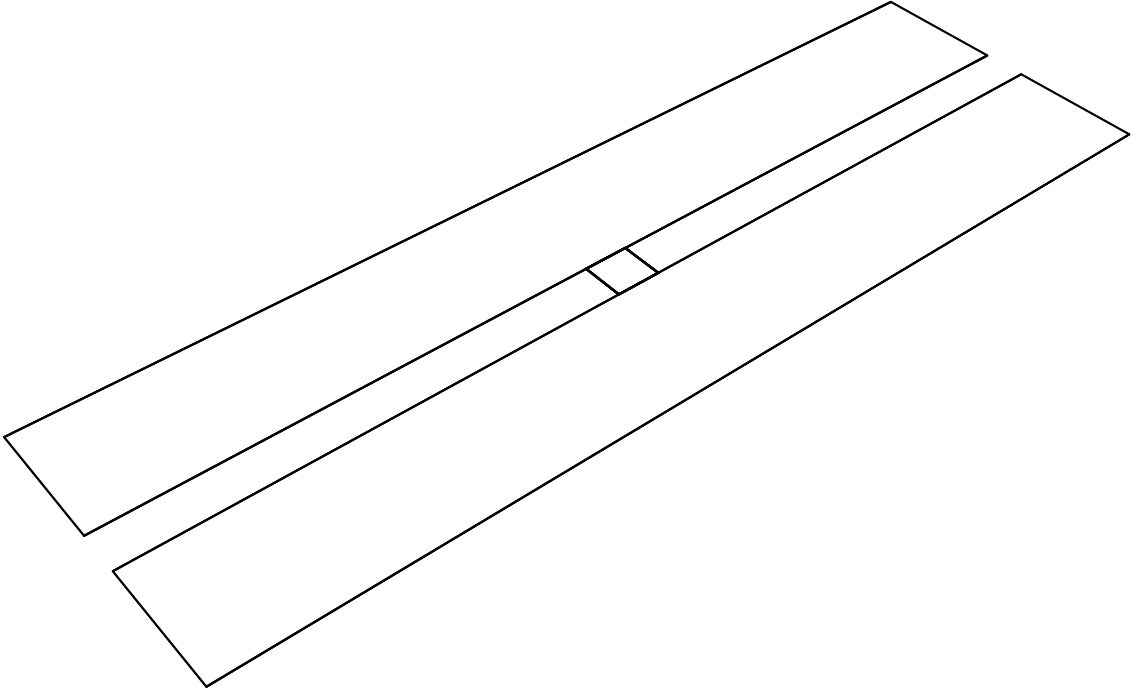

In [41]:
subprocess.call(('fasthenry', '-f', 'simple', 'mod720x20.inp'))
subprocess.call(('zbuf', 'zbuffile'))
# Convert to png with preview..
Image(filename='images/mod720x20.png')

#### FastHenry Simulation

In [45]:
filename = "mod720x20.inp"
subprocess.call(('fasthenry', filename))
Ls = loadtxt('Zc.mat', skiprows=2, dtype=complex)[1]
Ls = Ls.imag
print("{}\t{}nH").format(filename, str(Ls*1e9))

mod720x20.inp	0.964266nH


## Mod 7.5 Qubit
Calculate the self inductance of various sizes of SQUID loops with the new Mod 7.5 Qubit Design


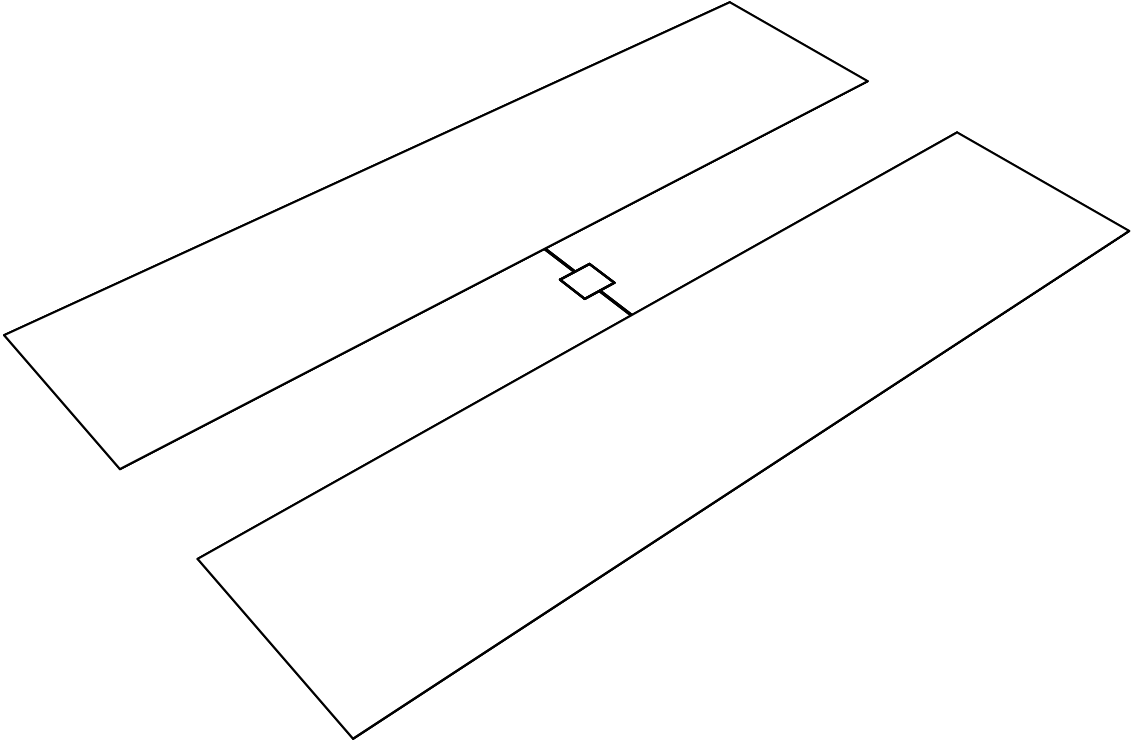

In [49]:
Image(filename='images/mod7.520x20.png')

#### FastHenry Simulation

In [48]:
results = []

# From 20x20 to 40x40
widths = linspace(15,35,5)
heights = linspace(15,35,5)

for height in heights:
    for width in widths:
        result = dict()
        filename = "{}x{}.inp".format(int(width),int(height))
        writeinputfile(filename, width=width, height=height)
        
        subprocess.call(('fasthenry', filename))
        
        Ls = loadtxt('Zc.mat', skiprows=2, dtype=complex)[1]
        Ls = Ls.imag
        
        result['filename'] = filename
        result['Ls'] = Ls
        result['width'] = width
        result['height'] = height
        results.append(result)
        
for result in results:
    if result['width'] == result['height']:
        print ("{}\t{}nH").format(result['filename'], result['Ls']*1e9)

15x15.inp	0.722676nH
20x20.inp	0.992401nH
25x25.inp	1.26848nH
30x30.inp	1.54961nH
35x35.inp	1.83496nH


So it looks like keeping the standard 20x20 micron ring is pretty close to the $L_s$ we are used to